In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
from numpy.f2py.cfuncs import includes

df = pd.read_csv("../data/raw/earthquakes_30d.csv")
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2026-02-01T23:56:27.080Z,38.827835,-122.852997,2.4500,0.75,md,10,130.0,0.003041,0.0100,...,2026-02-01T23:58:00.794Z,"10 km NW of The Geysers, CA",earthquake,0.35,0.59000,0.340000,15.0,automatic,nc,nc
1,2026-02-01T23:55:58.060Z,33.537000,-116.720333,5.7000,0.40,ml,24,42.0,0.031670,0.1000,...,2026-02-01T23:59:34.584Z,"5 km WSW of Anza, CA",earthquake,0.13,0.31000,0.070489,12.0,automatic,ci,ci
2,2026-02-01T23:43:08.689Z,39.038000,-119.604300,14.4030,1.94,ml,16,64.0,0.144000,0.1069,...,2026-02-01T23:46:10.918Z,"10 km NNE of Fish Springs, Nevada",earthquake,NaN,0.48940,0.270000,9.0,automatic,nn,nn
3,2026-02-01T23:39:13.549Z,31.888000,-101.754000,3.7177,1.10,ml,10,77.0,0.100000,0.6000,...,2026-02-02T00:00:56.237Z,"25 km W of Garden City, Texas",earthquake,0.00,1.71191,0.300000,7.0,automatic,tx,tx
4,2026-02-01T23:33:16.930Z,38.830166,-122.818665,1.8400,1.04,md,19,67.0,0.009526,0.0100,...,2026-02-01T23:34:50.642Z,"8 km NW of The Geysers, CA",earthquake,0.22,0.45000,0.080000,22.0,automatic,nc,nc


In [18]:
df.shape

(9946, 22)

In [19]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
time,9946,9946,2026-01-03T00:15:17.460Z,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,9946.0,NaN,NaN,NaN,39.843606,17.129799,-60.0521,33.204,38.742084,57.047792,70.8283
longitude,9946.0,NaN,NaN,NaN,-112.909505,62.824056,-179.9992,-148.704,-122.421167,-115.899292,179.9337
depth,9946.0,NaN,NaN,NaN,19.31913,46.539438,-3.36,3.26,6.84665,13.26,619.726
mag,9941.0,NaN,NaN,NaN,1.608176,1.198147,-1.77,0.88,1.49,2.0,6.4
magType,9941,8,ml,6766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nst,9946.0,NaN,NaN,NaN,26.082043,21.505749,0.0,11.0,20.0,34.0,216.0
gap,9946.0,NaN,NaN,NaN,104.21288,62.545251,12.0,59.0,85.0,130.0,352.0
dmin,9946.0,NaN,NaN,NaN,0.376821,1.23608,0.0,0.02282,0.072945,0.3,39.778
rms,9946.0,NaN,NaN,NaN,0.305685,0.310539,0.0,0.1,0.18,0.47,4.1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9946 entries, 0 to 9945
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9946 non-null   object 
 1   latitude         9946 non-null   float64
 2   longitude        9946 non-null   float64
 3   depth            9946 non-null   float64
 4   mag              9941 non-null   float64
 5   magType          9941 non-null   object 
 6   nst              9946 non-null   int64  
 7   gap              9946 non-null   float64
 8   dmin             9946 non-null   float64
 9   rms              9946 non-null   float64
 10  net              9946 non-null   object 
 11  id               9946 non-null   object 
 12  updated          9946 non-null   object 
 13  place            9946 non-null   object 
 14  type             9946 non-null   object 
 15  horizontalError  9662 non-null   float64
 16  depthError       9827 non-null   float64
 17  magError      

In [21]:
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [22]:
df["time"].head()

0    2026-02-01T23:56:27.080Z
1    2026-02-01T23:55:58.060Z
2    2026-02-01T23:43:08.689Z
3    2026-02-01T23:39:13.549Z
4    2026-02-01T23:33:16.930Z
Name: time, dtype: object

In [23]:
df["time"]=pd.to_datetime(df["time"], errors="coerce")
df = df.set_index(df["time"]).sort_index()
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
time,,,,,,,,,,,,,,,,,,,,,
2026-01-03 00:15:17.460000+00:00,2026-01-03 00:15:17.460000+00:00,37.414500,-118.739167,14.77,1.07,md,23,85.0,0.152900,0.11,...,2026-01-13T05:04:48.267Z,"12 km W of Round Valley, CA",earthquake,0.29,1.19,0.107000,9.0,reviewed,nc,nc
2026-01-03 00:16:13.995000+00:00,2026-01-03 00:16:13.995000+00:00,60.336000,-139.905000,5.00,2.30,ml,20,77.0,0.300000,1.00,...,2026-01-03T00:18:03.373Z,"88 km N of Yakutat, Alaska",earthquake,0.00,NaN,0.300000,4.0,automatic,ak,ak
2026-01-03 00:19:29.610000+00:00,2026-01-03 00:19:29.610000+00:00,32.919000,-115.526667,8.30,1.06,ml,17,78.0,0.033550,0.25,...,2026-01-13T23:35:22.674Z,"7 km S of Brawley, CA",earthquake,0.49,0.43,0.336896,13.0,reviewed,ci,ci
2026-01-03 00:23:20.339000+00:00,2026-01-03 00:23:20.339000+00:00,64.789000,-148.379000,5.00,1.20,ml,10,128.0,0.200000,0.80,...,2026-01-03T00:24:27.405Z,"18 km WSW of Ester, Alaska",earthquake,0.00,NaN,0.400000,4.0,automatic,ak,ak
2026-01-03 00:30:09.710000+00:00,2026-01-03 00:30:09.710000+00:00,60.051833,-153.078333,1.31,-0.61,ml,5,128.0,0.009234,0.16,...,2026-01-04T00:50:18.820Z,"64 km ENE of Pedro Bay, Alaska",earthquake,1.23,0.72,0.379202,5.0,reviewed,av,av


In [24]:
missing = pd.DataFrame({
    "count": df.isna().sum(),
    "rate": df.isna().mean()
}).sort_values("count", ascending=False)

missing[missing["count"] > 0]


,count,rate
horizontalError,284,0.028554
depthError,119,0.011965
magError,37,0.003720
magNst,10,0.001005
mag,5,0.000503
magType,5,0.000503


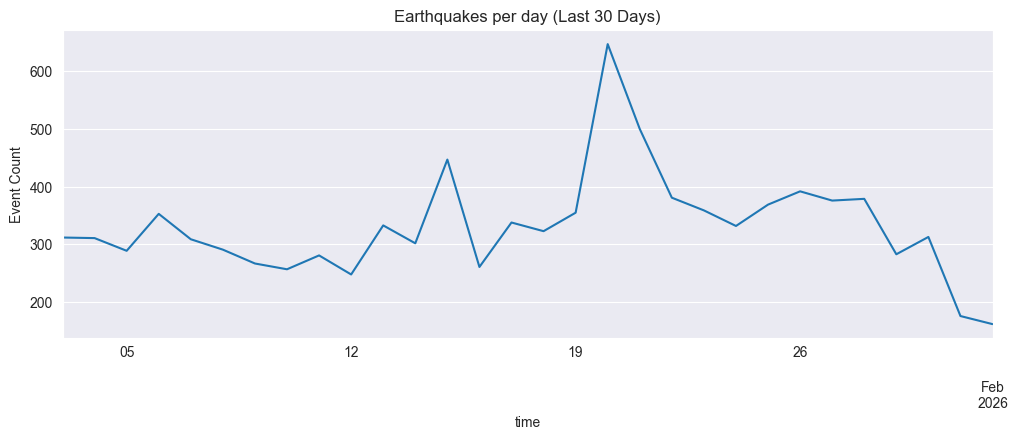

In [25]:
df.resample("D").size().plot(figsize=(12,4))
plt.title("Earthquakes per day (Last 30 Days)")
plt.ylabel("Event Count")
plt.show()

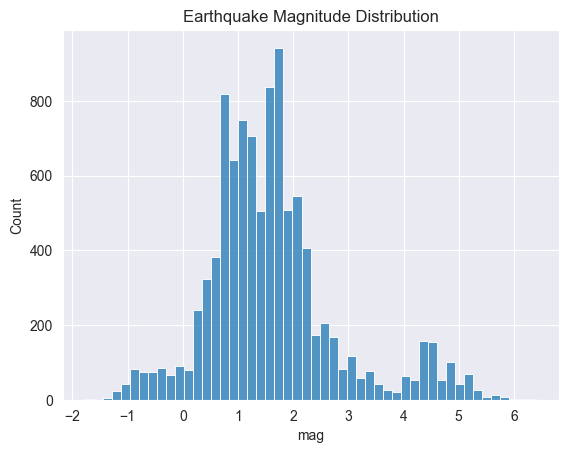

In [26]:
sns.histplot(df["mag"], bins=50)
plt.title("Earthquake Magnitude Distribution")
plt.show()


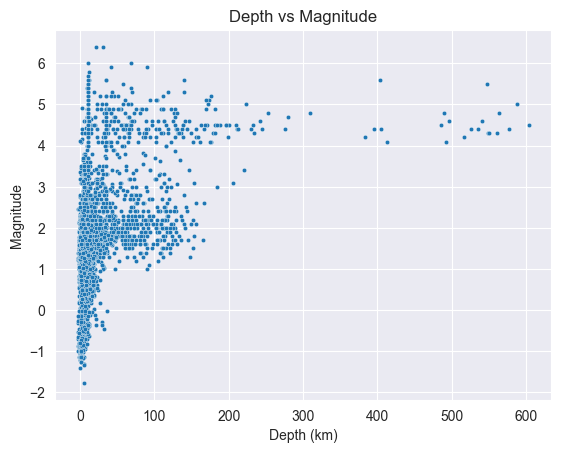

In [27]:
sns.scatterplot(
    data=df.sample(5000, random_state=42),
    x="depth",
    y="mag",
    s=10
)
plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")
plt.title("Depth vs Magnitude")
plt.show()


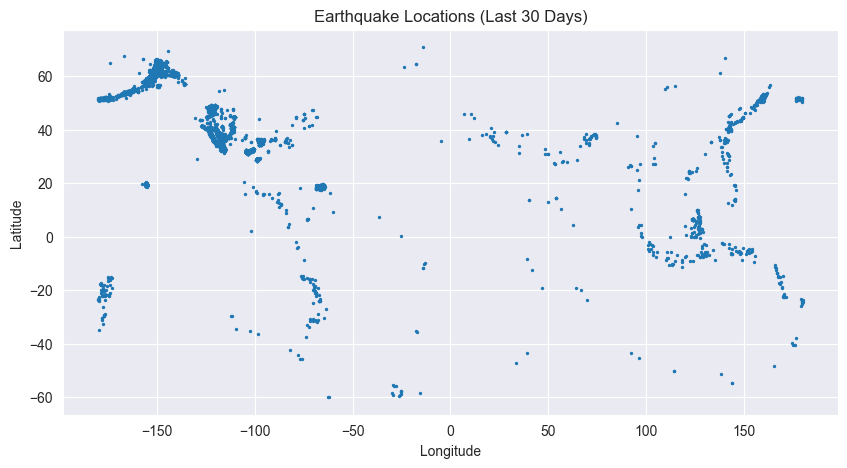

In [28]:
plt.figure(figsize=(10,5))
plt.scatter(df["longitude"], df["latitude"], s=2)
plt.title("Earthquake Locations (Last 30 Days)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [30]:
missing = (
    df.isna()
    .agg(["sum", "mean"])
    .T
    .rename(columns={"sum": "missing_count", "mean": "missing_rate"})
    .sort_values("missing_rate", ascending=False)
)
missing

,missing_count,missing_rate
horizontalError,284.0,0.028554
depthError,119.0,0.011965
magError,37.0,0.003720
magNst,10.0,0.001005
mag,5.0,0.000503
magType,5.0,0.000503
longitude,0.0,0.000000
depth,0.0,0.000000
time,0.0,0.000000
latitude,0.0,0.000000


In [33]:
import pandas as pd
import numpy as np

def find_non_numeric_values(df: pd.DataFrame) -> pd.DataFrame:
    results = []

    # Only inspect object/string columns
    object_cols = df.select_dtypes(include=["object", "string"]).columns

    for col in object_cols:
        series = df[col]

        # Drop nulls
        non_null = series.dropna()

        # Remove empty or whitespace-only strings
        non_empty = non_null[non_null.astype(str).str.strip() != ""]

        # Attempt numeric conversion
        coerced = pd.to_numeric(non_empty, errors="coerce")

        # Identify bad values
        bad_mask = coerced.isna()
        bad_values = non_empty[bad_mask]

        if len(bad_values) > 0:
            results.append({
                "column": col,
                "bad_count": len(bad_values),
                "bad_examples": bad_values.unique()[:10].tolist()
            })

    return pd.DataFrame(results)

In [34]:
find_non_numeric_values(df)

,column,bad_count,bad_examples
0,magType,9941,"[md, ml, mb, mww, mb_lg, mh, mw, mwr]"
1,net,9946,"[nc, ak, ci, av, us, uu, hv, tx, pr, se]"
2,id,9946,"[nc75290051, ak2026adrztg, ci41151367, ak2026a..."
3,updated,9946,"[2026-01-13T05:04:48.267Z, 2026-01-03T00:18:03..."
4,place,9946,"[12 km W of Round Valley, CA, 88 km N of Yakut..."
5,type,9946,"[earthquake, explosion, quarry blast, ice quak..."
6,status,9946,"[reviewed, automatic]"
7,locationSource,9946,"[nc, ak, ci, av, us, uu, hv, tx, pr, se]"
8,magSource,9946,"[nc, ak, ci, av, us, uu, hv, tx, pr, se]"
